In [59]:
import numpy as np
import matplotlib.pyplot as plt
import MagneT 
import pandas as pd

In [3]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


In [4]:
M = MagneT.MagneT() 

Let's calculate de density of state:

In [ ]:
g = M.gESS()

Then the grand thermodynamic potential

In [5]:
Om = M.OmegaC()

In [6]:
Mag = M.MagC()

In [32]:
np.shape(g)

(1002, 5000)

In [33]:
df = pd.DataFrame({'Bfield':B, 'DOS': g[0,:-1], 'Grand Potential': Om[:-1], 'Magnetization': Mag})

In [36]:
df.columns

Index(['Bfield', 'DOS', 'Grand Potential', 'Magnetization'], dtype='object')

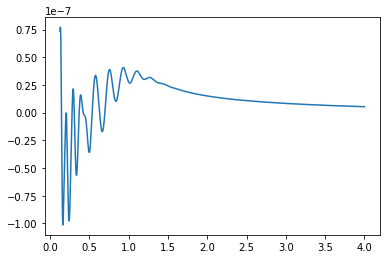

In [60]:
B = M._B[:-1]
plt.plot(1/B,Mag)

Interactive visualisation using Dash (pip install Dash)
Opens at the adress: http://127.0.0.1:8050/

In [57]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

available_indicators = ['Grand potential','Magnetization']

app.layout = html.Div(children=[
    html.H1(children='Magnetization in Quantum Hall regime'),
      html.Div(children='''
        Visualization to understand magnetization
    '''),
     html.Div([
            dcc.Dropdown(
                id='yaxis-column',
                options=[{'label': i, 'value': i} for i in df.columns[1:]],
                value='Fertility rate, total (births per woman)'
            )]),

    html.Div([
        dcc.Graph(
            id='example-graph')]
    )])
           

@app.callback(
    dash.dependencies.Output('example-graph', 'figure'),
    [dash.dependencies.Input('yaxis-column', 'value')])
def update_graph(yaxis_column_name):
    return {
        'data': [dict(
            x=df['Bfield'],
            y=df[yaxis_column_name],
           # text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            #customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            #mode='markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )]
    }



if __name__ == '__main__':
    app.run_server(debug=False)
    
    


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
